In [12]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Data Import Cleaning

In [13]:
# Step 1: Load and Clean Data
# Load the data
file_path = "C:/Users/a3588/Documents/GitHub/e-commerce-campaign-performance-analysis/Resources/Campaign performance - Campaign performance.csv"
data = pd.read_csv(file_path)

df = pd.read_csv(file_path)
df.head()

,Year,Month,Cost,Impr.,Clicks,CTR,Avg. CPC,Conversions,Conv. value,Cost / conv.,Conv. rate,Conv. value / cost
0,2024,September,11775.16,1207608,21742,1.8%,0.54,400.41,151098.36,29.41,1.58%,12.83
1,2024,October,12696.47,1110237,20626,1.86%,0.62,281.11,130921.39,45.17,1.25%,10.31
2,2024,November,11665.86,1167579,19578,1.68%,0.60,219.81,143522.34,53.07,1.03%,12.30
3,2024,December,9573.65,815420,13951,1.71%,0.69,161.33,90888.58,59.34,1.03%,9.49
4,2025,January,11467.00,1031181,18103,1.76%,0.63,242.98,114567.74,47.19,1.21%,9.99


In [14]:
# Preprocess data
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))
df['CTR'] = df['CTR'].str.rstrip('%').astype(float) / 100
df['Conv. rate'] = df['Conv. rate'].str.rstrip('%').astype(float) / 100
df['AOV'] = df['Conv. value'] / df['Conversions']

C:\Users\a3588\AppData\Local\Temp\ipykernel_30772\105993846.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))


C:\Users\a3588\AppData\Local\Temp\ipykernel_30772\62975210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ROAS'] = df['Conv. value / cost']


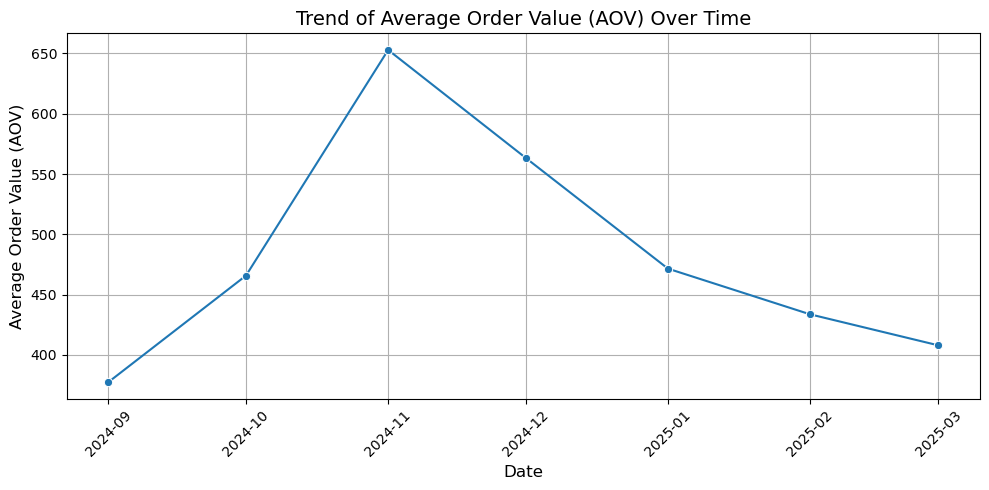

In [15]:
# Cleaned dataframe
df_cleaned = df[['Date', 'Cost', 'Impr.', 'Clicks', 'CTR', 'Conversions', 'Conv. value', 'AOV']]
df_cleaned['ROAS'] = df['Conv. value / cost']

# --- AOV Trend Plot ---
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="Date", y="AOV", marker="o", linestyle="-")
plt.title("Trend of Average Order Value (AOV) Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Order Value (AOV)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# save the plot
plt.savefig('AOV_trend_plot.png') 

plt.show()

  


In [16]:
# Add interpretation
print("\n=== AOV Trend Analysis ===")
monthly_aov = df_cleaned.groupby('Date')['AOV'].mean()
print(f"Highest AOV: ${monthly_aov.max():.2f}")
print(f"Lowest AOV: ${monthly_aov.min():.2f}")
print(f"Average AOV: ${monthly_aov.mean():.2f}")


=== AOV Trend Analysis ===
Highest AOV: $652.94
Lowest AOV: $377.36
Average AOV: $481.76


In [17]:
# --- Pre/Post AOV Analysis ---
change_date = "2024-12-01" 
before_data = df_cleaned[df_cleaned["Date"] < change_date]["AOV"].dropna()
after_data = df_cleaned[df_cleaned["Date"] >= change_date]["AOV"].dropna()


before_mean = before_data.mean()
after_mean = after_data.mean()
t_stat, p_value = ttest_ind(before_data, after_data, equal_var=False)

print("=== Pre/Post AOV Analysis ===")
print(f"Before Change (Avg AOV): ${before_mean:.2f}")
print(f"After Change (Avg AOV):  ${after_mean:.2f}")
print(f"T-test: t-stat={t_stat:.3f}, p-value={p_value:.3f}\n")

=== Pre/Post AOV Analysis ===
Before Change (Avg AOV): $498.68
After Change (Avg AOV):  $469.08
T-test: t-stat=0.336, p-value=0.761



In [18]:
# Add interpretation
print("\nInterpretation:")
if p_value < 0.05:
    print("- There is a statistically significant difference in AOV before and after December 2024")
else:
    print("- No statistically significant difference in AOV before and after December 2024")
print(f"- The AOV {'increased' if after_mean > before_mean else 'decreased'} by ${abs(after_mean - before_mean):.2f}")


Interpretation:
- No statistically significant difference in AOV before and after December 2024
- The AOV decreased by $29.60


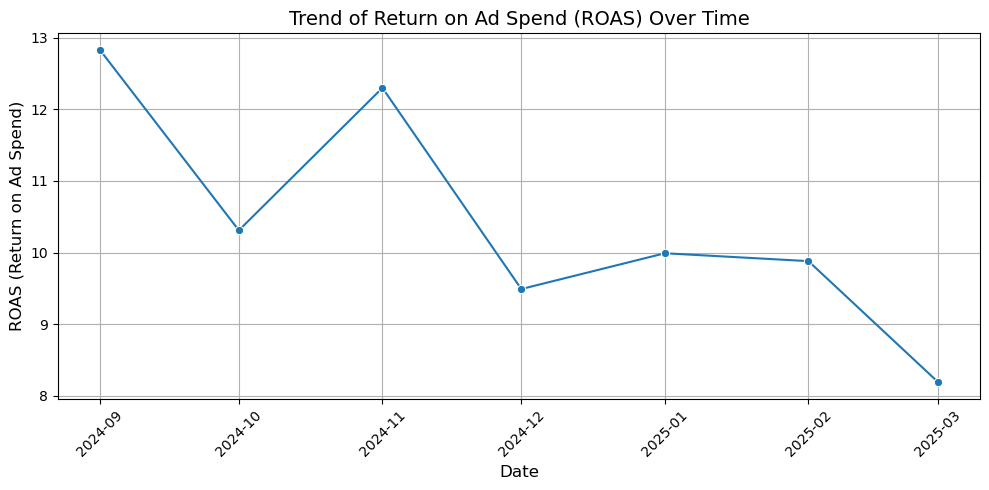


=== ROAS Trend Analysis ===
Highest ROAS: 12.83x (Month: September 2024)
Lowest ROAS: 8.19x (Month: March 2025)
Average ROAS: 10.43x

ROAS Change from September 2024 to March 2025:
Starting ROAS: 12.83x
Ending ROAS: 8.19x
Percentage Change: -36.2%


In [19]:
# --- ROAS Trend Plot ---
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="Date", y="ROAS", marker="o", linestyle="-")
plt.title("Trend of Return on Ad Spend (ROAS) Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("ROAS (Return on Ad Spend)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# save the plot
plt.savefig('ROAS_trend_plot.png')

plt.show()

# Add interpretation
print("\n=== ROAS Trend Analysis ===")
monthly_roas = df_cleaned.groupby('Date')['ROAS'].mean()
print(f"Highest ROAS: {monthly_roas.max():.2f}x (Month: {monthly_roas.idxmax().strftime('%B %Y')})")
print(f"Lowest ROAS: {monthly_roas.min():.2f}x (Month: {monthly_roas.idxmin().strftime('%B %Y')})")
print(f"Average ROAS: {monthly_roas.mean():.2f}x")

# Calculate ROAS change
first_roas = monthly_roas.iloc[0]
last_roas = monthly_roas.iloc[-1]
roas_change = ((last_roas - first_roas) / first_roas) * 100

print(f"\nROAS Change from {df_cleaned['Date'].min().strftime('%B %Y')} to {df_cleaned['Date'].max().strftime('%B %Y')}:")
print(f"Starting ROAS: {first_roas:.2f}x")
print(f"Ending ROAS: {last_roas:.2f}x")
print(f"Percentage Change: {roas_change:.1f}%")

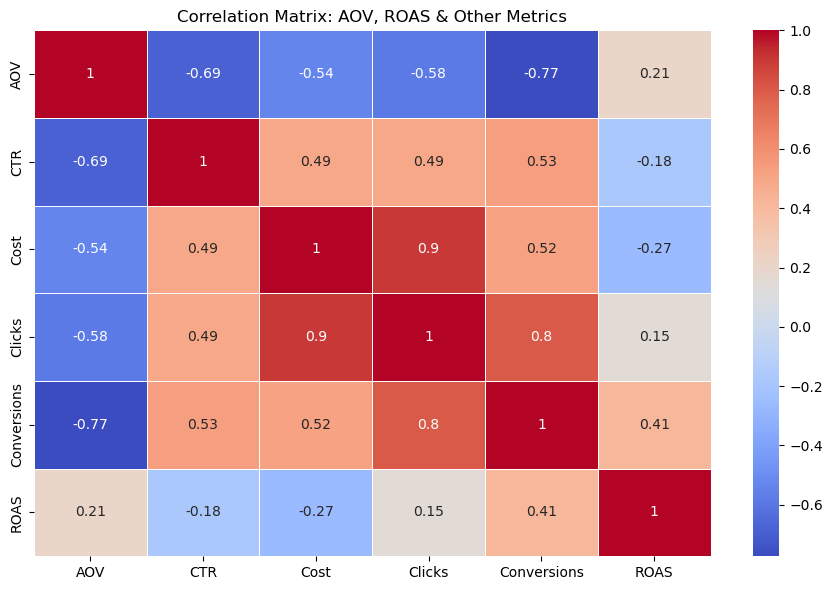

In [20]:
# --- Correlation Analysis ---
correlation_matrix = df_cleaned[['AOV', 'CTR', 'Cost', 'Clicks', 'Conversions', 'ROAS']].corr()
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix: AOV, ROAS & Other Metrics")
plt.tight_layout()
plt.show()

In [21]:

# Add interpretation
print("\n=== Key Correlation Findings ===")
# Get strongest correlations with AOV
aov_correlations = correlation_matrix['AOV'].sort_values(ascending=False)
print("Strongest correlations with AOV:")
for metric, corr in aov_correlations.items():
    if metric != 'AOV' and abs(corr) > 0.3:  # threshold for meaningful correlation
        print(f"- {metric}: {corr:.3f}")


=== Key Correlation Findings ===
Strongest correlations with AOV:
- Cost: -0.538
- Clicks: -0.584
- CTR: -0.689
- Conversions: -0.774


In [22]:
# Final Summary
print("\n=== Overall Campaign Performance Summary ===")
print(f"1. Campaign Period: {df_cleaned['Date'].min().strftime('%B %Y')} to {df_cleaned['Date'].max().strftime('%B %Y')}")
print(f"2. Average ROAS: {df_cleaned['ROAS'].mean():.2f}x")
print(f"3. Average Conversion Rate: {df['Conv. rate'].mean():.2%}")
print("4. Key Findings:")
print("   - AOV Analysis:", "Significant change" if p_value < 0.05 else "No significant change", "after December 2024")
print(f"   - ROAS Trend: {'Positive' if df_cleaned['ROAS'].iloc[-1] > df_cleaned['ROAS'].iloc[0] else 'Negative'} trend")


=== Overall Campaign Performance Summary ===
1. Campaign Period: September 2024 to March 2025
2. Average ROAS: 10.43x
3. Average Conversion Rate: 1.19%
4. Key Findings:
   - AOV Analysis: No significant change after December 2024
   - ROAS Trend: Negative trend
